Lab: Random Forest™
====

By The End Of This Lab You Should Be Able To:
----

- Fit Random Forest™ to variety of datasets
- Download data from the web
- Munge categorical data into a format amendable to Machine Learning


Parts
------


1. Toy dataset - Moons 🌛
1. Built-in dataset - Wine 🍷
1. "Wild" dataset - Mushroom 🍄

Part 1a: Fit Random Forest™ to Moon dataset
------

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

In [3]:
from sklearn.datasets import make_moons

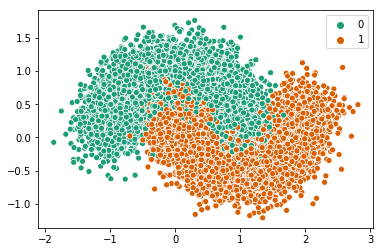

In [4]:
noisy_moons = make_moons(n_samples=10_000, noise=.25, random_state=42)

sns.scatterplot(x=noisy_moons[0][:, 0],
                y=noisy_moons[0][:, 1],
                hue=noisy_moons[1],
                palette=palette);

In [5]:
from sklearn.model_selection import train_test_split

# Load and split the data
X_train, X_test, y_train, y_test = train_test_split(noisy_moons[0], noisy_moons[1], test_size=0.3, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf_moon = RandomForestClassifier(random_state=42)
rf_moon.fit(X_train, y_train)
rf_moon_acc = rf_moon.score(X_test, y_test)
"""
Fit a RandomForestClassifier to this data. Find accuracy on test data.
As always, if an algorithm takes random_state, set it equal to random_state=42.

NOTE: Just write code in this cell. Do not create a function.
"""

# YOUR CODE HERE
# raise NotImplementedError()

print(f"{rf_moon_acc:.4f}")

0.9337


In [8]:
"""
2 points
Test code for the cell above.
This cell should NOT give any errors when it is run.
"""
from math import isclose

assert rf_moon.__class__.__name__.split('.')[-1] == 'RandomForestClassifier'
assert isclose(rf_moon_acc, 0.9336666666666666)

Part 1b: Grid Search Random Forest™ to Moon dataset
------

Hint: Is there a Random Forest™ hyperparameter that could spend up training?

In [18]:
from sklearn.model_selection import GridSearchCV

params = dict(criterion = ['gini','entropy'],
              n_estimators = range(40,100,2))
gs = GridSearchCV(estimator=RandomForestClassifier(),
                  param_grid=params,
                  cv=10,
                  scoring='accuracy')
gs.fit(X_train, y_train)
gs_rf_acc = gs.score(X_test, y_test)
"""
Write code to conduct Grid Search on RandomForestClassifier to find best number of trees and best criterion.
As always, if an algorithm takes random_state, set it equal to random_state=42.

NOTE: Just write code in this cell. Do not create a function.
"""

# YOUR CODE HERE
# raise NotImplementedError()

print(f"{gs_rf_acc:.4f}")

0.9387


In [21]:
"""
4 points
Test code for the cell above.
This cell should NOT give any errors when it is run.
"""

best_params = gs.best_params_
assert set(best_params.keys()) == {'criterion', 'n_estimators'}
assert gs_rf_acc >  0.9351

Part 2: Fit Random Forest™ to Wine dataset
------

In [22]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [23]:
rf_wine = RandomForestClassifier(random_state=42)
rf_wine.fit(X_train, y_train)
rf_wine_acc = rf_wine.score(X_test, y_test)
"""
Fit a RandomForestClassifier to this data. Find accuracy on test data.

NOTE: Just write code in this cell. Do not create a function.
"""

# YOUR CODE HERE
# raise NotImplementedError()
print(f"{rf_wine_acc:.4f}")

0.9259


In [24]:
"""
2 points
Test code for the cell above.
This cell should NOT give any errors when it is run.
"""
from math import isclose

assert rf_wine.__class__.__name__.split('.')[-1] == 'RandomForestClassifier'
assert isclose(rf_wine_acc, 0.9259259259259259)

In [25]:
importances = [(importance, feature) for importance,feature in zip(rf_wine.feature_importances_, data.feature_names)]
importances = sorted(importances, key=lambda x: x[0], reverse=True)
features_most_important_to_least = [importance[1] for importance in importances]
"""
Create a sorted list of features by importance.

NOTE: Just write code in this cell. Do not create a function.
"""

# YOUR CODE HERE
# raise NotImplementedError()

'\nCreate a sorted list of features by importance.\n\nNOTE: Just write code in this cell. Do not create a function.\n'

In [28]:
"""
5 points
Test code for the cell above.
There are hidden tests. They will make sure features_most_important_to_least are correctly ordered
This cell should NOT give any errors when it is run.
"""

features_most_important_to_least[0] == 'flavanoids'
features_most_important_to_least[-1] == 'nonflavanoid_phenols'


True

Part 3: Fit Random Forest™ to Mushroom dataset
------

Descriptions of hypothetical samples mushrooms. Each species is identified as edible (e) or poisonous (p).

Learn more:

- https://archive.ics.uci.edu/ml/datasets/mushroom
- https://www.kaggle.com/uciml/mushroom-classification/version/1

In [29]:
import os

from urllib.request import urlretrieve

path_remote = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/"
path_local = "."
filename = "agaricus-lepiota.data"

In [30]:
def download_data(path_remote: str, path_local: str, filename: str) -> None:
    """Write code that retrieves the data from url.
    Make sure to check if file is local, if not then retrieve it.
    """
    # Download the data
    if not os.path.exists(filename):
        urlretrieve(url=os.path.join(path_remote,filename), filename=filename)
    # YOUR CODE HERE
    # raise NotImplementedError()

In [31]:
"""
2 points
Test code for the 'download_data' function. 
This cell should NOT give any errors when it is run.
"""

local_file = os.path.join(path_local, filename)
if os.path.exists(local_file):
    os.remove(local_file)
    
download_data(path_remote, path_local, filename)

assert os.path.exists(local_file)

In [32]:
df = pd.read_csv(local_file, header=None)
labels = df.iloc[:,0]
features = df.iloc[:,1:]
labels = pd.get_dummies(labels).iloc[:,1]
features = pd.get_dummies(features)

"""
Write code to do the following:
1. Load data with Pandas
2. Separate targets / labels
3. Convert targets / labels to dummy encoding
4. Convert every categorical feature with one hot encoding

Hint: Remove unneeded columns from your dataframe as you go.

NOTE: Just write code in this cell. Do not create a function.
"""

# YOUR CODE HERE
# raise NotImplementedError()

'\nWrite code to do the following:\n1. Load data with Pandas\n2. Separate targets / labels\n3. Convert targets / labels to dummy encoding\n4. Convert every categorical feature with one hot encoding\n\nHint: Remove unneeded columns from your dataframe as you go.\n\nNOTE: Just write code in this cell. Do not create a function.\n'

In [33]:
"""
10 points
Test code for the cell above.
This cell should NOT give any errors when it is run.
"""

assert type(labels) == pd.core.series.Series
assert labels.shape == (8124,)
assert labels[1] == 0
assert labels[42] == 0
assert labels[8123] == 0

assert type(features) == pd.core.frame.DataFrame
assert features.shape == (8124, 117)
assert features.iloc[0, 0] == 0
assert features.iloc[2, 0] == 1
assert features.iloc[8123, 0] == 0

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [35]:
rf_mushroom = RandomForestClassifier(random_state=42)
rf_mushroom.fit(X_train, y_train)
rf_mushroom_acc = rf_mushroom.score(X_test, y_test)
"""
Fit a RandomForestClassifier to this data. Find accuracy on test data.
As always, if an algorithm takes random_state, set it equal to random_state=42.

NOTE: Just write code in this cell. Do not create a function.
"""
# YOUR CODE HERE
# raise NotImplementedError()

print(f"{rf_mushroom_acc:.4f}")

1.0000


In [36]:
"""
2 points
Test code for the cell above.
This cell should NOT give any errors when it is run.
"""

assert rf_mushroom.__class__.__name__.split('.')[-1] == 'RandomForestClassifier'
assert rf_mushroom_acc == 1.0000

In [37]:
from sklearn.naive_bayes import *
nb_mushroom = BernoulliNB()
nb_mushroom.fit(X_train, y_train)
nb_mushroom_acc = nb_mushroom.score(X_test, y_test)
"""
Fit a Naive Bayes to this data. Find accuracy on test data.

Hint: You must import the correct implementation of Naive Bayes from scikit-learn. 

NOTE: Just write code in this cell. Do not create a function.
"""
# YOUR CODE HERE
# raise NotImplementedError()

print(f"{nb_mushroom_acc:.4f}")

0.9344


In [38]:
"""
2 points
Test code for the cell above.
There are hidden tests. They will make sure you used the correct version of Naive Bayes.
This cell should NOT give any errors when it is run.
"""
from math import isclose

assert isclose(nb_mushroom_acc, 0.9343724364232978)
assert set(nb_mushroom.classes_) == {0, 1} 
 

Bonus Cartoon
------

<center><img src="https://imgs.xkcd.com/comics/mushrooms.png" width="75%"/></center>


<br>
<br> 
<br>

----